In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
from config import gkey

gmaps.configure(api_key=gkey)

In [2]:
structure_loss = pd.read_csv ('Fire.csv')
structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,7,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,7,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,7,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,7,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,7,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


In [3]:
structure_loss["STRUCTURE TYPE"].count()

621

In [4]:
structure_loss["STRUCTURE TYPE"].value_counts

<bound method IndexOpsMixin.value_counts of 0      7
1      7
2      7
3      7
4      7
      ..
616    7
617    7
618    7
619    9
620    7
Name: STRUCTURE TYPE, Length: 621, dtype: int64>

In [5]:
#unique structures included in the data set
unique_structure_df = structure_loss["STRUCTURE TYPE"].unique()

unique_structure_df

array([ 7,  4,  2, 10,  1,  6,  9,  3,  8,  5])

In [6]:
#average percent loss by structure type
avg_loss_structure = structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
1      3.750000
2      9.191324
3     14.255000
4      1.840000
5      5.000000
6      0.199000
7     11.270205
8      1.502000
9     30.586154
10    11.431250
Name: PERCENTAGE LOSS, dtype: float64

In [7]:
#clean up structure types to consolidate "like" or "same" names
cleaned_structure_loss = structure_loss.replace({
     "APARTMENT":"APARTMENT",
     "APARTMENTS":"APARTMENT",     
     "APARTMENTS (ROOF TOP)":"APARTMENT",      
    
     "COMMERCIAL":"COMMERCIAL",                
     "COMMERICAL":"COMMERCIAL",                  
     "COMMERICAL/WAREHOUSE": "COMMERCIAL",
     
     "CONDO": "CONDOMINIUM",                   
     "CONDOMINIUM": "CONDOMINIUM",                    
     "CONDOMINIUMS": "CONDOMINIUM",
     "CONDOMINUM": "CONDOMINIUM",
     
     "DWELLING": "DWELLING",                               
     "DWELLING (WINDOW)": "DWELLING", 
    
     "4 PLEX": "FOURPLEX",
    
     "MANUFACTURE":"MANUFACTURE",                               
     "MANUFACTURING": "MANUFACTURE",
    
     "PORTABLE BLDG":"PORTABLE BUILDING",
    
     "HOTEL": "LODGING",
     "MOTEL": "LODGING"
     
    })
cleaned_structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,7,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,7,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,7,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,7,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,7,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


***Total Number of Unique Structure Types***

In [8]:
#total number of structures for structure type, grouped by percentage loss
avg_loss_structure = cleaned_structure_loss.groupby(["STRUCTURE TYPE"]).count()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
1       2
2      68
3      12
4      12
5       3
6      10
7     488
8       5
9      13
10      8
Name: PERCENTAGE LOSS, dtype: int64

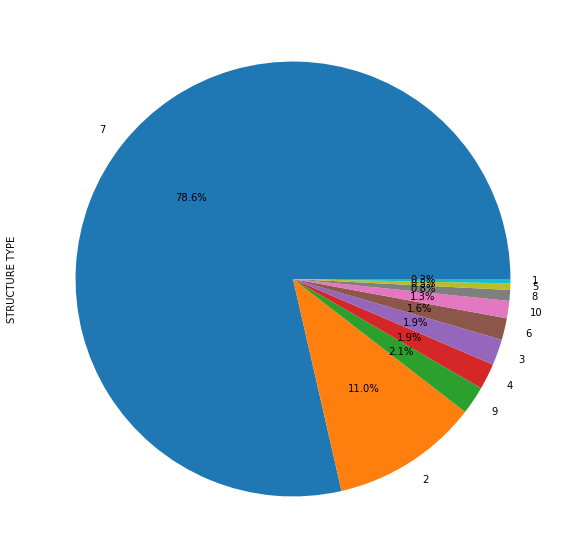

In [9]:
structure_type = cleaned_structure_loss['STRUCTURE TYPE'].value_counts()

fig = plt.figure(figsize=(10,10))
structure_type.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.show()

***Average Percentage Loss per Structure***

In [10]:
#new average percent loss by structure type
avg_loss_structure = cleaned_structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

avg_loss_structure

STRUCTURE TYPE
1      3.750000
2      9.191324
3     14.255000
4      1.840000
5      5.000000
6      0.199000
7     11.270205
8      1.502000
9     30.586154
10    11.431250
Name: PERCENTAGE LOSS, dtype: float64

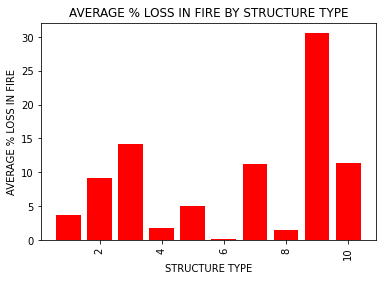

In [11]:
unique_structure=cleaned_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = avg_loss_structure
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['red'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("AVERAGE % LOSS IN FIRE")
plt.title("AVERAGE % LOSS IN FIRE BY STRUCTURE TYPE")

#plt.tight_layout()
plt.show()

***Merge All Residential Buildings=RESIDENTIAL and Structures <1%=OTHER***

In [12]:
new_structure_loss = cleaned_structure_loss.replace({
     "APARTMENT":"RESIDENTIAL",
     "APARTMENTS":"RESIDENTIAL",     
     "APARTMENTS (ROOF TOP)":"RESIDENTIAL",
    
     "DUPLEX":"RESIDENTIAL",
    
     "DWELLING":"RESIDENTIAL",
                          
     "CONDO":"RESIDENTIAL",
     "CONDOMINIUM":"RESIDENTIAL",
     "CONDOMINIUMS":"RESIDENTIAL",
     "CONDOMINUM":"RESIDENTIAL",

     "DWELLING":"RESIDENTIAL", 
     "DWELLING (WINDOW)":"RESIDENTIAL",
    
     "FOURPLEX":"RESIDENTIAL",
    
     "MANUFACTURE":"RESIDENTIAL",
     "MANUFACTURING":"RESIDENTIAL",
    
     "MOBILE HOME":"RESIDENTIAL",
    
     "TOWNHOME":"RESIDENTIAL",
    
     "CARPORT":"OTHER",               
     "LAUNDRY ROOM":"OTHER",         
     "MANUFACTURE":"OTHER",
     "PORTABLE BUILDING":"OTHER",      
     "RETAIL":"OTHER",               
     "SCHOOL":"OTHER",                
     "SHOPPING MALL":"OTHER"
       
    })
new_structure_loss.head()

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,7,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,7,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,7,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,7,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,7,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816


***New Total Number of Unique Structure Types***

In [13]:
total_loss_structure = new_structure_loss.groupby(["STRUCTURE TYPE"]).count()["PERCENTAGE LOSS"]

total_loss_structure

STRUCTURE TYPE
1       2
2      68
3      12
4      12
5       3
6      10
7     488
8       5
9      13
10      8
Name: PERCENTAGE LOSS, dtype: int64

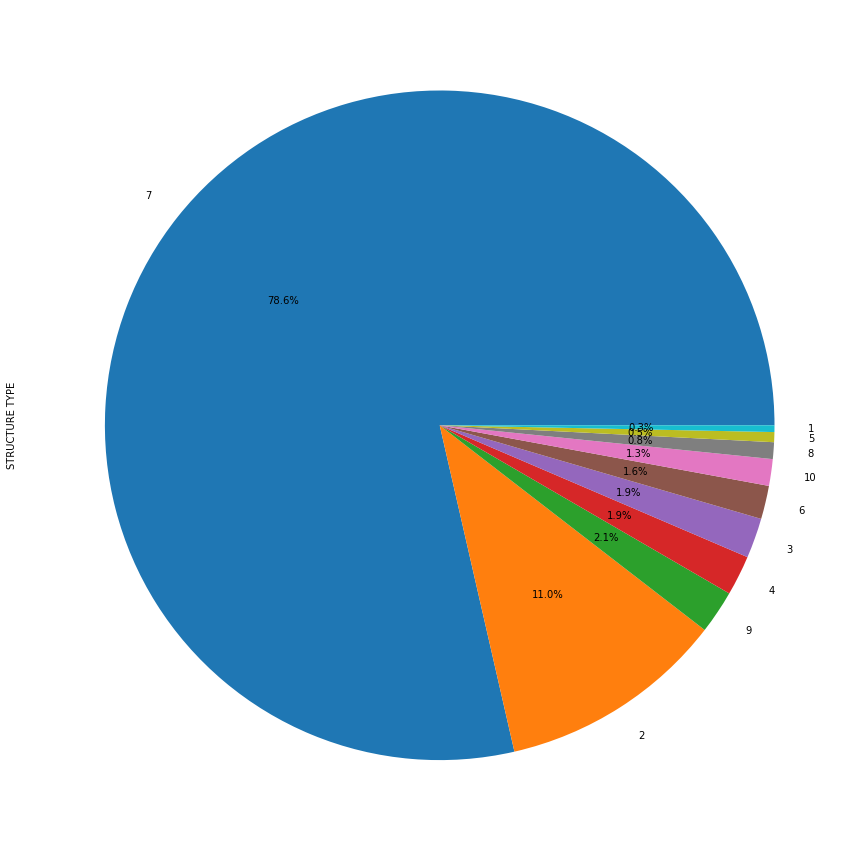

In [14]:
fire_type = new_structure_loss['STRUCTURE TYPE'].value_counts()

fig = plt.figure(figsize=(15,30))
fire_type.plot(kind="pie",autopct="%1.1f%%")

plt.xticks(rotation=90)
plt.show()

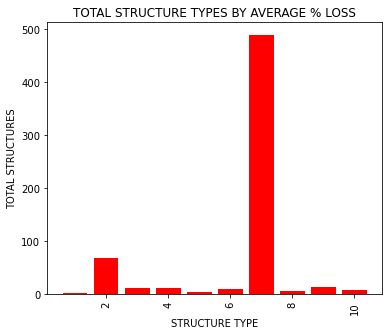

In [15]:
unique_structure=new_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = total_loss_structure
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['red'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("TOTAL STRUCTURES")
plt.title("TOTAL STRUCTURE TYPES BY AVERAGE % LOSS")

#plt.tight_layout()
plt.show()

*OTHER = CARPORT, LAUNDRY ROOM, MANUFACTURE, PORTABLE BUILDING, RETAIL, SCHOOL, SHOPPING MALL*

***New Average Percentage Loss per Structure after Final Merges***

In [16]:
percent_loss_structure = new_structure_loss.groupby(["STRUCTURE TYPE"]).mean()["PERCENTAGE LOSS"]

percent_loss_structure

STRUCTURE TYPE
1      3.750000
2      9.191324
3     14.255000
4      1.840000
5      5.000000
6      0.199000
7     11.270205
8      1.502000
9     30.586154
10    11.431250
Name: PERCENTAGE LOSS, dtype: float64

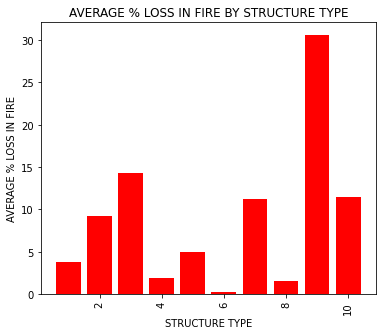

In [17]:
unique_structure=new_structure_loss['STRUCTURE TYPE'].unique()
unique_structure.sort()
#print(unique_structure)

x_axis = unique_structure
y_axis = percent_loss_structure
plt.figure(figsize=(6,5))
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color=['red'])

plt.xlabel("STRUCTURE TYPE")
plt.ylabel("AVERAGE % LOSS IN FIRE")
plt.title("AVERAGE % LOSS IN FIRE BY STRUCTURE TYPE")

#plt.tight_layout()
plt.show()

*OTHER = CARPORT, LAUNDRY ROOM, MANUFACTURE, PORTABLE BUILDING, RETAIL, SCHOOL, SHOPPING MALL*

***Heatmap of AVG Percent Loss of Structure Type***

In [18]:
# Configure gmaps.
gmaps.configure(api_key=gkey)

In [19]:
lat_for_map=new_structure_loss['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=new_structure_loss['Lng'].astype(float)
lng_for_map.astype(float)

0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [20]:
# Use the Lat and Lng as locations and Percentage Loss as the weight.
locations = new_structure_loss[["Lat", "Lng"]]
structure_type_pct_loss = new_structure_loss["PERCENTAGE LOSS"].astype(float)

In [21]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '450px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [22]:
# Add Heatmap layer to map.
fig = gmaps.figure(layout=figure_layout, map_type="HYBRID", center=(32.83, -96.75), zoom_level=10)

heat_layer = gmaps.heatmap_layer(locations, weights=structure_type_pct_loss, 
                                 dissipating=False, max_intensity=100, 
                                 point_radius=0.02)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='450px', margin='0 auto 0 auto', padding='1px', wi…

In [23]:
info_box_template = """
<dl>
<dt>Structure Type</dt><dd>{STRUCTURE TYPE}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
structure_info = [info_box_template.format(**row) for index, row in new_structure_loss.iterrows()]
locations = new_structure_loss[["Lat", "Lng"]]

In [24]:
# Customize the size of the figure
figure_layout = {
    'width': '500px',
    'height': '550px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [25]:
fires_df=new_structure_loss[['Lat','Lng']]
fires_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)
fig=gmaps.figure(layout=figure_layout, center=(32.83, -96.74), zoom_level=10)
fig.add_layer(fires_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [26]:
heat_layer = gmaps.heatmap_layer(locations, weights=structure_type_pct_loss, 
                                 dissipating=False, max_intensity=100, 
                                 point_radius=0.02)

marker_layer=gmaps.symbol_layer(fires_df,fill_color=(255,165,0),stroke_color=(0,0,0),scale=2)

# Display figure
fig = gmaps.figure()
fig = gmaps.figure(layout=figure_layout, map_type="HYBRID", center=(32.83, -96.74), zoom_level=10)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='550px', margin='0 auto 0 auto', padding='1px', wi…

In [27]:
# structure_df = new_structure_loss.set_index('STRUCTURE TYPE')

# structure_df.loc['CHURCH']

In [28]:
# Customize the size of the figure
figure_layout = {
    'width': '500px',
    'height': '550px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [29]:
structure_df = new_structure_loss.set_index('STRUCTURE TYPE')

structure_church=structure_df.loc['CHURCH']
structure_layer_1=structure_church[['Lat','Lng']]

structure_commercial=structure_df.loc['COMMERCIAL']
structure_layer_2=structure_commercial[['Lat','Lng']]

structure_garage=structure_df.loc['GARAGE']
structure_layer_3=structure_garage[['Lat','Lng']]

structure_lodging=structure_df.loc['LODGING']
structure_layer_4=structure_lodging[['Lat','Lng']]

structure_office=structure_df.loc['OFFICE']
structure_layer_5=structure_office[['Lat','Lng']]

structure_other=structure_df.loc['OTHER']
structure_layer_6=structure_other[['Lat','Lng']]

structure_residential=structure_df.loc['RESIDENTIAL']
structure_layer_7=structure_residential[['Lat','Lng']]

structure_restaurant=structure_df.loc['RESTAURANT']
structure_layer_8=structure_restaurant[['Lat','Lng']]

structure_shed=structure_df.loc['SHED']
structure_layer_9=structure_shed[['Lat','Lng']]

structure_warehouse=structure_df.loc['WAREHOUSE']
structure_layer_10=structure_warehouse[['Lat','Lng']]

layer_1=gmaps.symbol_layer(structure_layer_1,fill_color=(0,255,0),stroke_color=(0,255,0),scale=4)    #GREEN
layer_2=gmaps.symbol_layer(structure_layer_2,fill_color=(0,0,254),stroke_color=(0,0,254),scale=2)    #BLUE
layer_3=gmaps.symbol_layer(structure_layer_3,fill_color=(255,0,0),stroke_color=(255,0,0),scale=2)    #RED
layer_4=gmaps.symbol_layer(structure_layer_4,fill_color=(255,165,0),stroke_color=(255,165,0),scale=3)  #ORANGE
layer_5=gmaps.symbol_layer(structure_layer_5,fill_color=(255,105,180),stroke_color=(255,105,180),scale=3)   #PINK
layer_6=gmaps.symbol_layer(structure_layer_6,fill_color=(0,255,255),stroke_color=(0,255,255),scale=3)     #aqua
layer_7=gmaps.symbol_layer(structure_layer_7,fill_color=(153,50,204),stroke_color=(153,50,204),scale=2)   #darkorchid
layer_8=gmaps.symbol_layer(structure_layer_8,fill_color=(150,75,0),stroke_color=(150,75,0),scale=3)    #BROWN
layer_9=gmaps.symbol_layer(structure_layer_9,fill_color=(128,128,128),stroke_color=(128,128,128),scale=2)    #GREY
layer_10=gmaps.symbol_layer(structure_layer_10,fill_color=(255,255,0),stroke_color=(255,255,0),scale=3)    #yellow1

fig=gmaps.figure(layout=figure_layout, map_type="TERRAIN", center=(32.83, -96.74), zoom_level=10)
fig.add_layer(layer_1)
fig.add_layer(layer_2)
fig.add_layer(layer_3)
fig.add_layer(layer_4)
fig.add_layer(layer_5)
fig.add_layer(layer_6)
fig.add_layer(layer_7)
fig.add_layer(layer_8)
fig.add_layer(layer_9)
fig.add_layer(layer_10)
fig

KeyError: 'CHURCH'